In [1]:
#Import the Library
import pandas as pd
import statistics
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
import statsmodels.api as sm
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.linear_model import LinearRegression
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.api import Holt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.stats.diagnostic import acorr_ljungbox
from statsmodels.tsa.statespace.sarimax import SARIMAX
from pmdarima import auto_arima

In [2]:
df=pd.read_csv('weather.csv')
df

,date,maxtp(Maximum Air Temperature - degrees C),mintp(Minimum Air Temperature - degrees C),gmin(Grass Minimum Temperature - degrees C),rain(Precipitation Amount - mm),cbl (Mean CBL Pressure-hpa),wdsp(Mean Wind Speed - knot),pe(Potential Evapotranspiration - mm),evap(Evaporation -mm)
0,1-Jan-42,9.7,6.8,4.7,0.0,1020.3,17.2,1.1,1.4
1,2-Jan-42,9.9,7.9,6.7,0.1,1016.2,15.2,0.7,0.9
2,3-Jan-42,11.2,8.9,7.2,1.5,1006.8,14.0,0.5,0.6
3,4-Jan-42,9.2,2.7,3.4,3.5,1001.5,17.0,0.6,0.7
4,5-Jan-42,3.5,-0.8,0,0.6,1013.4,13.0,0.6,0.7
...,...,...,...,...,...,...,...,...,...
29884,27-Oct-23,13.2,4.1,-1,2.9,974.2,5.8,0.5,0.8
29885,28-Oct-23,14.1,9.3,7.2,4.4,970.1,8.5,0.7,1
29886,29-Oct-23,12.4,2.5,-1.2,11.1,972.0,5.2,0.4,0.6
29887,30-Oct-23,12.7,1.7,-1.3,2.1,979.9,4.1,0.3,0.5


In [3]:
#Datatype of column
df.dtypes

date                                            object
maxtp(Maximum Air Temperature - degrees C)     float64
mintp(Minimum Air Temperature - degrees C)     float64
gmin(Grass Minimum Temperature - degrees C)     object
rain(Precipitation Amount - mm)                float64
cbl (Mean CBL Pressure-hpa)                    float64
wdsp(Mean Wind Speed - knot)                   float64
pe(Potential Evapotranspiration - mm)          float64
evap(Evaporation -mm)                           object
dtype: object

In [4]:
#Count the null values column wise
df.isna().sum()

date                                           0
maxtp(Maximum Air Temperature - degrees C)     0
mintp(Minimum Air Temperature - degrees C)     0
gmin(Grass Minimum Temperature - degrees C)    0
rain(Precipitation Amount - mm)                0
cbl (Mean CBL Pressure-hpa)                    0
wdsp(Mean Wind Speed - knot)                   0
pe(Potential Evapotranspiration - mm)          0
evap(Evaporation -mm)                          0
dtype: int64

In [5]:
#Date String to Year
def convert_year(date_str):
    date_split = date_str.split('-')
    year = int(date_split[2])
    if year >= 42 and year<69:  # assuming all years >= 42 belong to the 20th century (1900s)
        return pd.to_datetime(date_str, format='%d-%b-%y') - pd.DateOffset(years=100)
    else:
        return pd.to_datetime(date_str, format='%d-%b-%y')
df['date'] = df['date'].apply(convert_year)

In [6]:
df['date'] = pd.to_datetime(df['date'])

In [7]:
df.set_index('date', inplace=True)

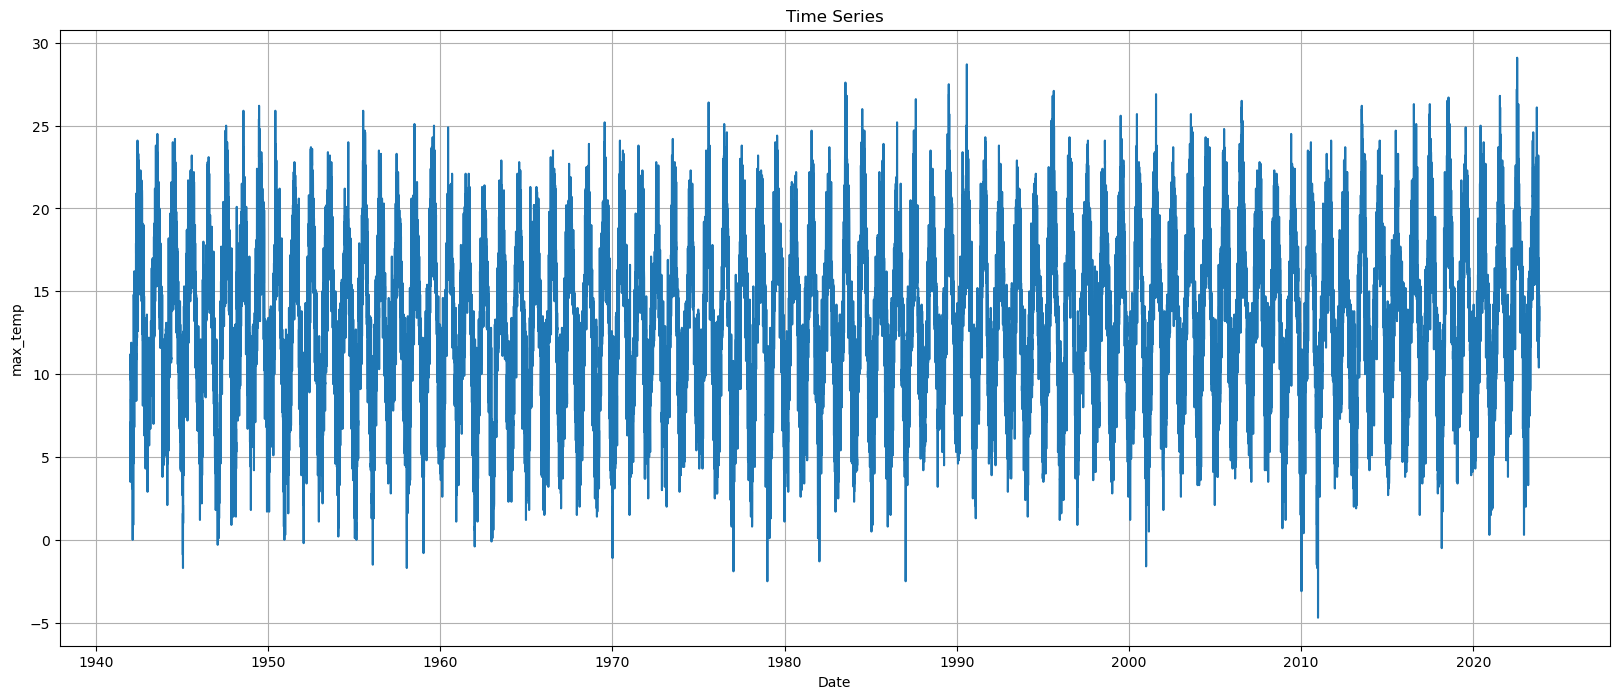

In [8]:
plt.figure(figsize=(20, 8))
plt.plot(df.index, df['maxtp(Maximum Air Temperature - degrees C)'])
plt.title('Time Series')
plt.xlabel('Date')
plt.ylabel('max_temp')
plt.grid(True)
plt.show()

# Visualisation

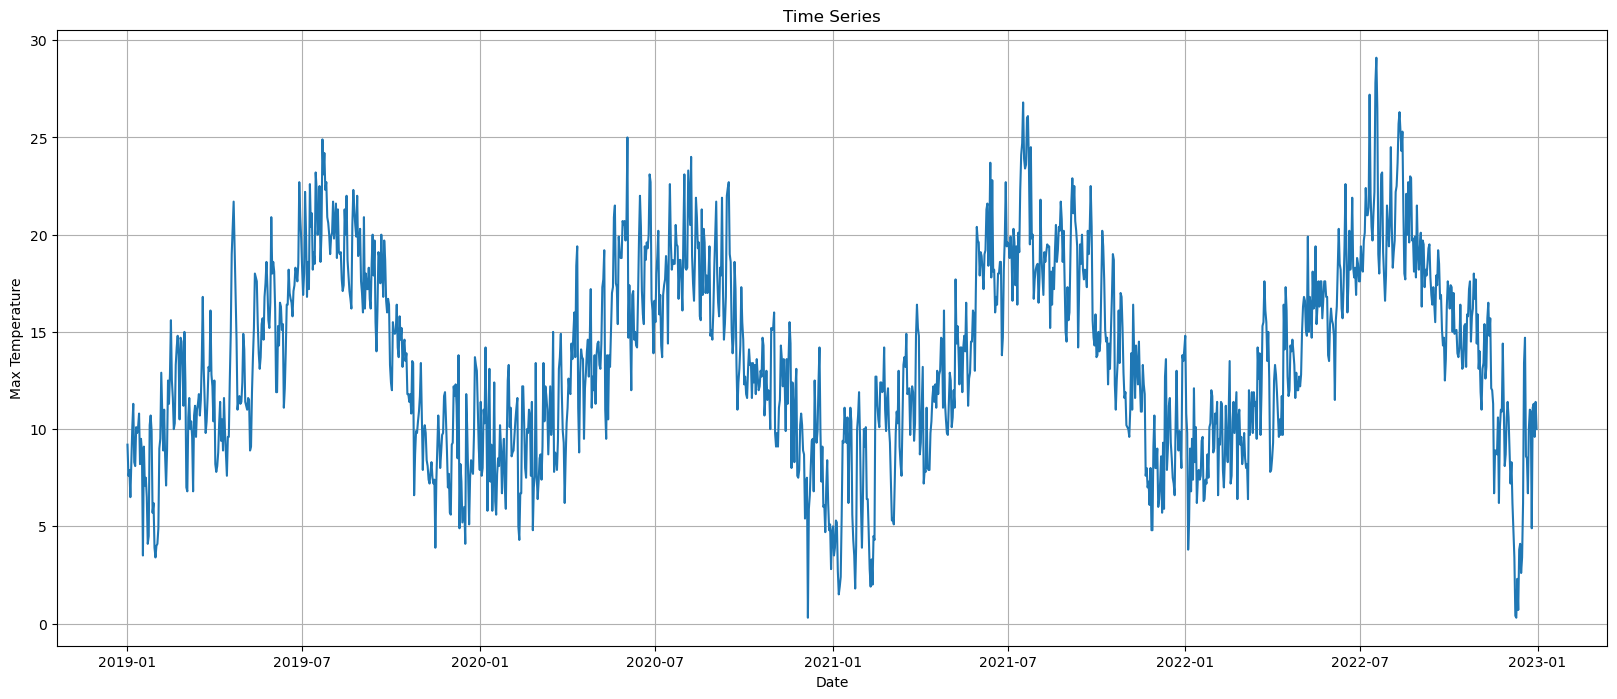

In [9]:
#Visualisation of Time Series from 2019 to 2022
df.reset_index(inplace=True)
filtered_df = df[df['date'].dt.year.between(2019, 2022)]
plt.figure(figsize=(20, 8))
plt.plot(filtered_df['date'], filtered_df['maxtp(Maximum Air Temperature - degrees C)'])
plt.title('Time Series')
plt.xlabel('Date')
plt.ylabel('Max Temperature')
plt.grid(True)
plt.show()

# Moving Average

C:\Users\gaura\AppData\Local\Temp\ipykernel_22076\2275715781.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['smoothed_max_temp'] = filtered_df['maxtp(Maximum Air Temperature - degrees C)'].rolling(window=window_size, center=True).mean()


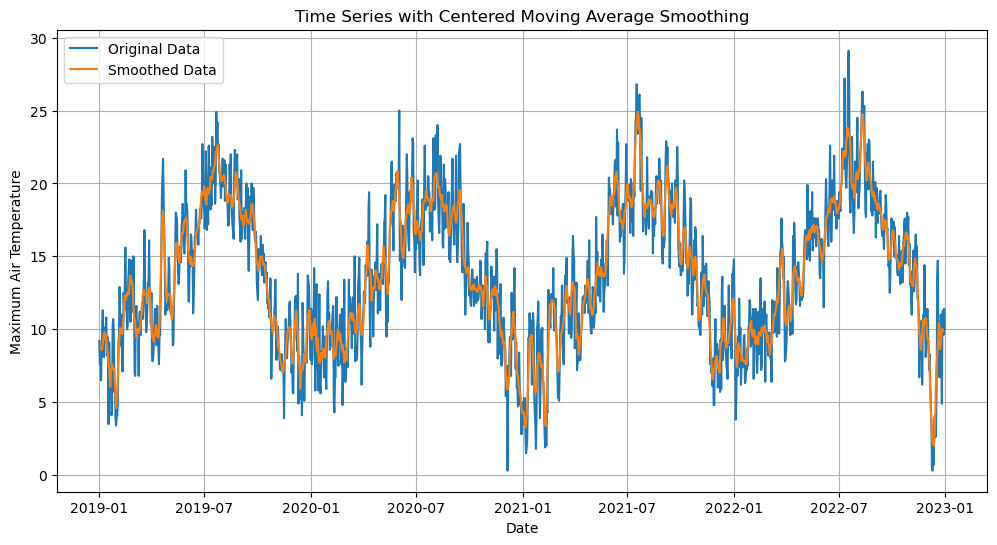

In [10]:
#Smoothing the Moving Average 
window_size = 7

filtered_df['smoothed_max_temp'] = filtered_df['maxtp(Maximum Air Temperature - degrees C)'].rolling(window=window_size, center=True).mean()

plt.figure(figsize=(12, 6))
plt.plot(filtered_df['date'], filtered_df['maxtp(Maximum Air Temperature - degrees C)'], label='Original Data')
plt.plot(filtered_df['date'], filtered_df['smoothed_max_temp'], label='Smoothed Data')
plt.title('Time Series with Centered Moving Average Smoothing')
plt.xlabel('Date')
plt.ylabel('Maximum Air Temperature')
plt.legend()
plt.grid(True)
plt.show()

C:\Users\gaura\AppData\Local\Temp\ipykernel_22076\2314982371.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['smoothed_max_temp'] = filtered_df['maxtp(Maximum Air Temperature - degrees C)'].rolling(window=window_size, center=True).mean()


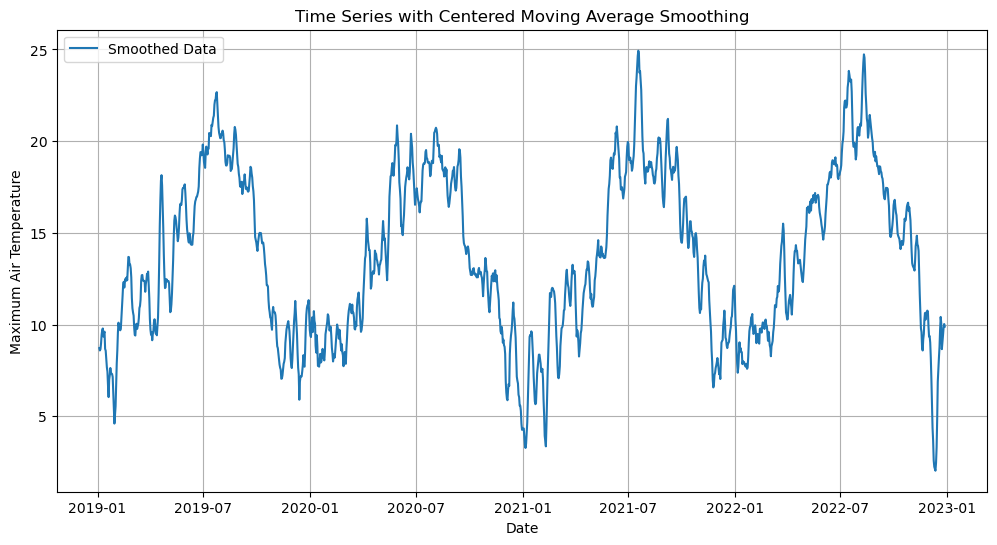

In [11]:
window_size = 7
filtered_df['smoothed_max_temp'] = filtered_df['maxtp(Maximum Air Temperature - degrees C)'].rolling(window=window_size, center=True).mean()

plt.figure(figsize=(12, 6))
plt.plot(filtered_df['date'], filtered_df['smoothed_max_temp'], label='Smoothed Data')
plt.title('Time Series with Centered Moving Average Smoothing')
plt.xlabel('Date')
plt.ylabel('Maximum Air Temperature')
plt.legend()
plt.grid(True)
plt.show()

# Decomposition of Season

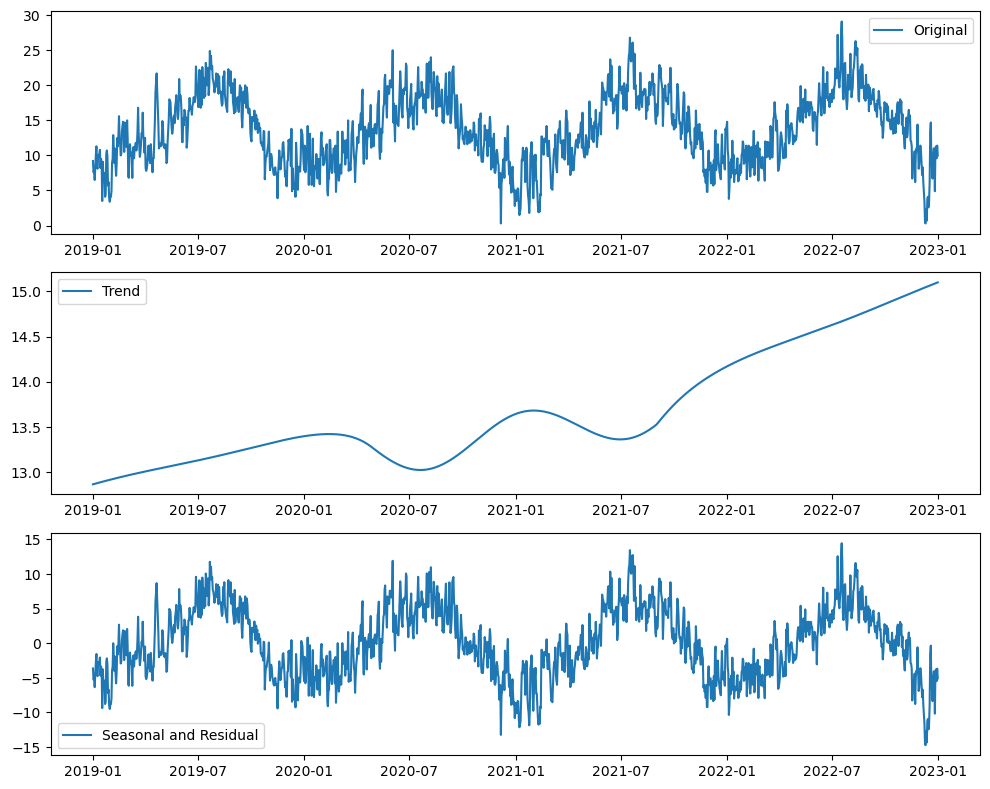

In [12]:
#Seasonal Decomposition using LOESS Decomposition
loess_smoothed = sm.nonparametric.lowess(filtered_df['maxtp(Maximum Air Temperature - degrees C)'], filtered_df.index)
trend = loess_smoothed[:, 1]
seasonal_residual = filtered_df['maxtp(Maximum Air Temperature - degrees C)'] - trend

plt.figure(figsize=(10, 8))

plt.subplot(311)
plt.plot(filtered_df['date'], filtered_df['maxtp(Maximum Air Temperature - degrees C)'], label='Original')
plt.legend()

plt.subplot(312)
plt.plot(filtered_df['date'], trend, label='Trend')
plt.legend()

plt.subplot(313)
plt.plot(filtered_df['date'], seasonal_residual, label='Seasonal and Residual')
plt.legend()

plt.tight_layout()
plt.show()

In [13]:
df.reset_index(inplace=True)

In [14]:
split_date = '01-01-2023'
start_date= '31-12-2018'
# Split the data into train and test sets
train_data = df[(df['date'] > start_date) & (df['date'] < split_date)]
test_data = df[df['date'] >= split_date]

# Simple time series - Average

Forecasted Value for 2023: 13.683230663928816
Actual Value for 2023: 15.044078947368419
Mean Absolute Error (MAE): 4.172936254908318
Mean Squared Error (MSE): 24.48476772851836
Root Mean Squared Error (RMSE): 4.948208537290881


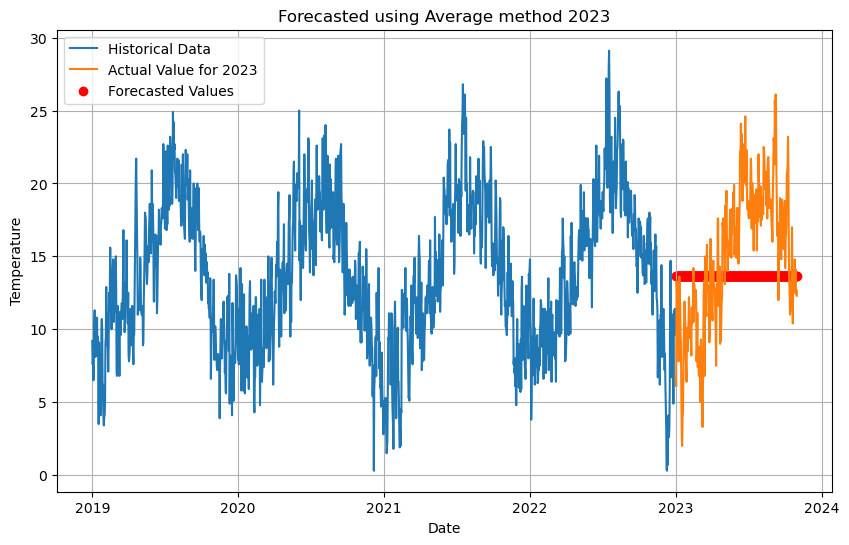

In [15]:
#Simple time series using Average method
average_value = train_data['maxtp(Maximum Air Temperature - degrees C)'].mean()
forecasted_values = [average_value] * len(test_data)
actual_value_2023 = test_data['maxtp(Maximum Air Temperature - degrees C)']
actual_value=actual_value_2023.mean()

print("Forecasted Value for 2023:", average_value)
print("Actual Value for 2023:", actual_value)

mae = mean_absolute_error(actual_value_2023, forecasted_values)
mse = mean_squared_error(actual_value_2023, forecasted_values)
rmse = mse ** 0.5

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)

plt.figure(figsize=(10, 6))

plt.plot(train_data['date'], train_data['maxtp(Maximum Air Temperature - degrees C)'], label='Historical Data')
plt.plot(test_data['date'], test_data['maxtp(Maximum Air Temperature - degrees C)'], label='Actual Value for 2023')
plt.scatter(test_data['date'], forecasted_values, color='red', label='Forecasted Values')
plt.xlabel('Date')
plt.ylabel('Temperature')
plt.title('Forecasted using Average method 2023')
plt.legend()
plt.grid(True)
plt.show()

# Simple time series - Naive

Forecasted Value for 2023: 10.0
Actual Value for 2023: 15.044078947368419
Mean Absolute Error (MAE): 5.8414473684210515
Mean Squared Error (MSE): 48.075592105263155
Root Mean Squared Error (RMSE): 6.9336564744197675


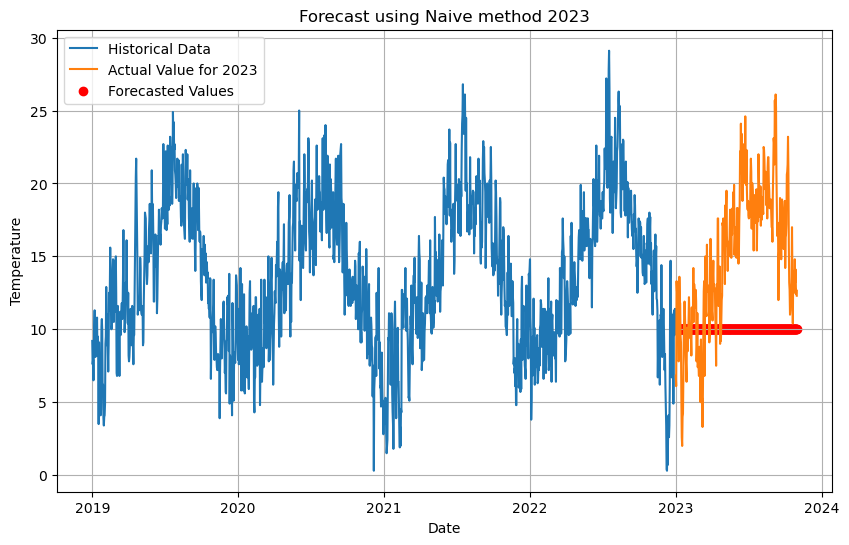

In [16]:
#Simple time series using Naive method
last_observed_value = train_data['maxtp(Maximum Air Temperature - degrees C)'].iloc[-1] 
forecasted_values = [last_observed_value] * len(test_data)
actual_value_2023 = test_data['maxtp(Maximum Air Temperature - degrees C)']
actual_value=actual_value_2023.mean()

print("Forecasted Value for 2023:", last_observed_value)
print("Actual Value for 2023:", actual_value)

mae = mean_absolute_error(actual_value_2023, forecasted_values)
mse = mean_squared_error(actual_value_2023, forecasted_values)
rmse = mse ** 0.5

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)

plt.figure(figsize=(10, 6))

plt.plot(train_data['date'], train_data['maxtp(Maximum Air Temperature - degrees C)'], label='Historical Data')
plt.plot(test_data['date'], test_data['maxtp(Maximum Air Temperature - degrees C)'], label='Actual Value for 2023')
plt.scatter(test_data['date'], forecasted_values, color='red', label='Forecasted Values')
plt.xlabel('Date')
plt.ylabel('Temperature')
plt.title('Forecast using Naive method 2023')
plt.legend()
plt.grid(True)
plt.show()

# Simple time series - Moving Average

Forecasted Value for 2023: 15.080794701986758
Actual Value for 2023: 15.044078947368419
Mean Absolute Error (MAE): 1.1773730684326713
Mean Squared Error (MSE): 2.270364238410596
Root Mean Squared Error (RMSE): 1.5067727892454774


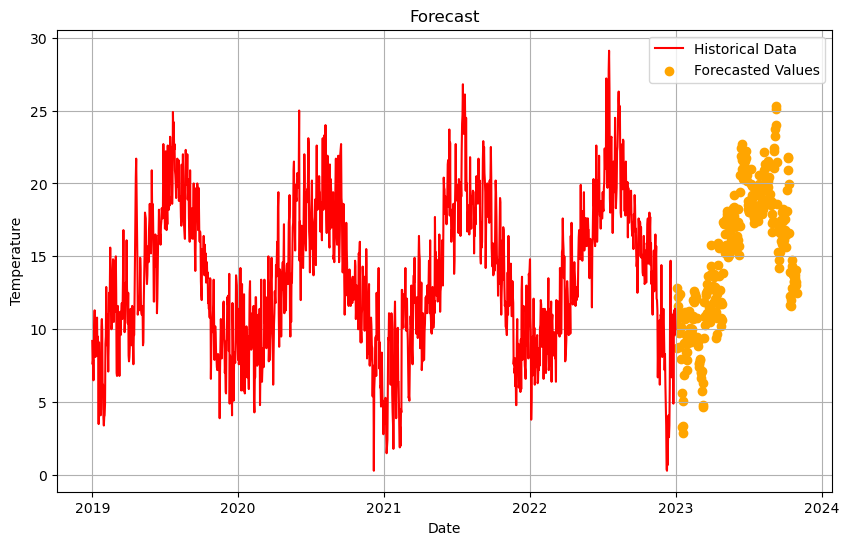

In [17]:
#Simple time series using Moving Average method
window_size = 3
average_train = train_data['maxtp(Maximum Air Temperature - degrees C)'].rolling(window=window_size).mean()
average_test = test_data['maxtp(Maximum Air Temperature - degrees C)'].rolling(window=window_size).mean()

average_test.dropna(inplace=True)
print("Forecasted Value for 2023:", average_test.mean())
print("Actual Value for 2023:", actual_value_2023.mean())
mae = mean_absolute_error(actual_value_2023[2:], average_test)
mse = mean_squared_error(actual_value_2023[2:], average_test)
rmse = mse ** 0.5  

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)

plt.figure(figsize=(10, 6))

plt.plot(train_data['date'],train_data['maxtp(Maximum Air Temperature - degrees C)'], color='red', label='Historical Data')
plt.scatter(test_data['date'][2:], average_test, color='orange', label='Forecasted Values')
plt.xlabel('Date')
plt.ylabel('Temperature')
plt.title('Forecast')
plt.legend()
plt.grid(True)
plt.show()

# Simple time series - Naive seasonal

Forecasted Value for 2023 (Naive Seasonal): 15.247039473684202
Actual Value for 2023: 15.044078947368419
Mean Absolute Error (MAE): 4.687828947368421
Mean Squared Error (MSE): 35.24615131578948
Root Mean Squared Error (RMSE): 5.936846916991332


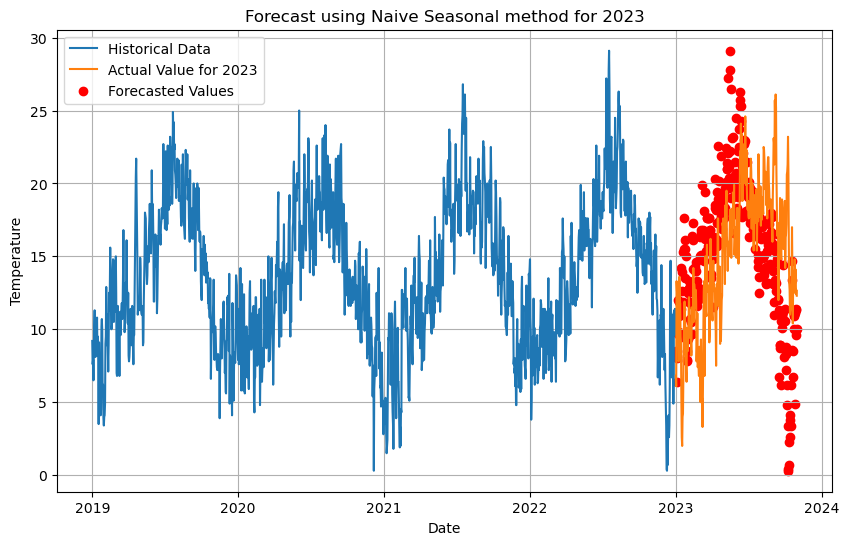

In [18]:
#Simple time series - Naive seasonal
last_observed_season = train_data['maxtp(Maximum Air Temperature - degrees C)'].iloc[-365:]

forecasted_values = last_observed_season.iloc[(len(last_observed_season) - len(test_data)):].tolist()
actual_value_2023 = test_data['maxtp(Maximum Air Temperature - degrees C)']
actual_value = actual_value_2023.mean()

print("Forecasted Value for 2023 (Naive Seasonal):", sum(forecasted_values)/len(forecasted_values))
print("Actual Value for 2023:", actual_value)

mae = mean_absolute_error(actual_value_2023, forecasted_values)
mse = mean_squared_error(actual_value_2023, forecasted_values)
rmse = mse ** 0.5

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)

plt.figure(figsize=(10, 6))
plt.plot(train_data['date'], train_data['maxtp(Maximum Air Temperature - degrees C)'], label='Historical Data')
plt.plot(test_data['date'], test_data['maxtp(Maximum Air Temperature - degrees C)'], label='Actual Value for 2023')
plt.scatter(test_data['date'], forecasted_values, color='red', label='Forecasted Values')
plt.xlabel('Date')
plt.ylabel('Temperature')
plt.title('Forecast using Naive Seasonal method for 2023')
plt.legend()
plt.grid(True)
plt.show()

# Simple Exponential Smoothing

C:\Users\gaura\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\gaura\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\gaura\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


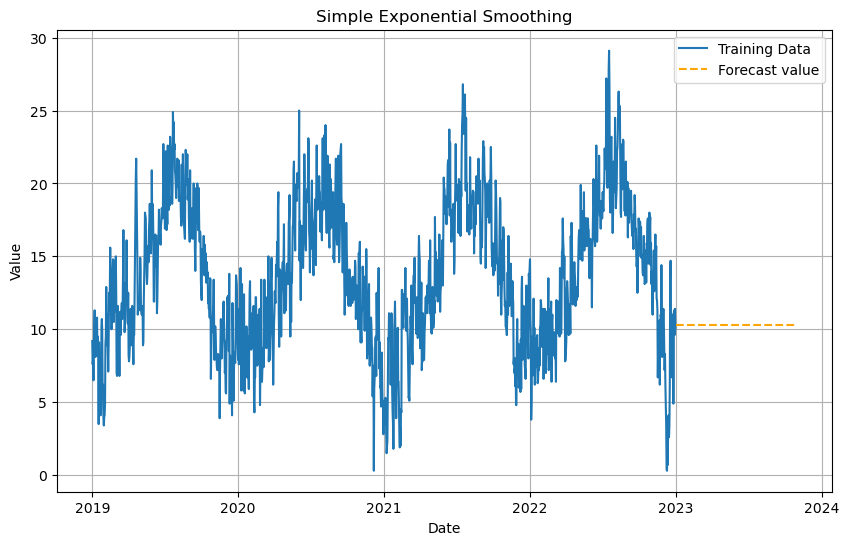

In [19]:
#Simple Exponential Smoothing
ts_train = train_data['maxtp(Maximum Air Temperature - degrees C)']
ts_fitting_evaluation = test_data['maxtp(Maximum Air Temperature - degrees C)']

model = SimpleExpSmoothing(ts_train)
fit_model = model.fit()

forecast_fitting_evaluation = fit_model.forecast(steps=len(ts_fitting_evaluation))

plt.figure(figsize=(10, 6))
plt.plot(train_data['date'],ts_train, label='Training Data')
plt.plot(test_data['date'], forecast_fitting_evaluation, label='Forecast value', linestyle='--', color='orange')
plt.title('Simple Exponential Smoothing')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()

In [20]:
fit_model.summary()

Dep. Variable:,maxtp(Maximum Air Temperature - degrees C),No. Observations:,1461
Model:,SimpleExpSmoothing,SSE,7364.437
Optimized:,True,AIC,2367.228
Trend:,None,BIC,2377.802
Seasonal:,None,AICC,2367.256
Seasonal Periods:,None,Date:,"Wed, 03 Jan 2024"
Box-Cox:,False,Time:,20:20:11
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.6629282,alpha,True
initial_level,9.2000000,l.0,False


In [21]:
rmse = np.sqrt(mean_squared_error(ts_fitting_evaluation, forecast_fitting_evaluation))
mae = mean_absolute_error(ts_fitting_evaluation, forecast_fitting_evaluation)
mse = mean_squared_error(ts_fitting_evaluation, forecast_fitting_evaluation)

print("RMSE:", rmse)
print("MAE:", mae)
print("MSE:", mse)

RMSE: 6.710467684611399
MAE: 5.63177170660018
MSE: 45.030376546213866


# Holt Exponential smoothing

C:\Users\gaura\AppData\Local\Temp\ipykernel_22076\414908582.py:5: FutureWarning: the 'damped' keyword is deprecated, use 'damped_trend' instead.
  model = ExponentialSmoothing(ts_train, trend='add', damped=True)
C:\Users\gaura\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\gaura\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\gaura\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


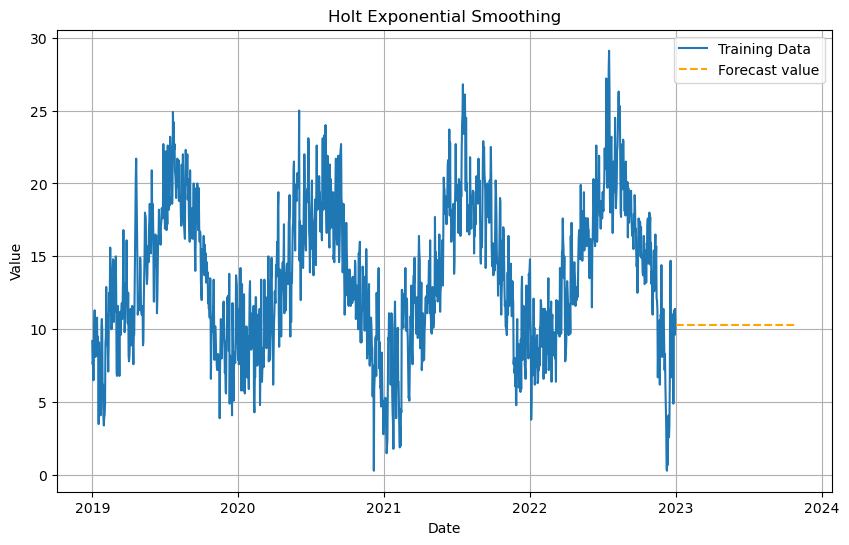

In [22]:
#Holt Expnential smoothing 
ts_train = train_data['maxtp(Maximum Air Temperature - degrees C)']
ts_fitting_evaluation = test_data['maxtp(Maximum Air Temperature - degrees C)']

model = ExponentialSmoothing(ts_train, trend='add', damped=True)
fit_model = model.fit()

forecast_fitting_evaluation = fit_model.forecast(steps=len(ts_fitting_evaluation))

plt.figure(figsize=(10, 6))
plt.plot(train_data['date'],ts_train, label='Training Data')
plt.plot(test_data['date'], forecast_fitting_evaluation, label='Forecast value', linestyle='--', color='orange')
plt.title('Holt Exponential Smoothing')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()

In [23]:
fit_model.summary()

Dep. Variable:,maxtp(Maximum Air Temperature - degrees C),No. Observations:,1461
Model:,ExponentialSmoothing,SSE,7363.674
Optimized:,True,AIC,2373.077
Trend:,Additive,BIC,2399.511
Seasonal:,None,AICC,2373.154
Seasonal Periods:,None,Date:,"Wed, 03 Jan 2024"
Box-Cox:,False,Time:,20:20:12
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.6624778,alpha,True
smoothing_trend,7.0616e-11,beta,True


In [24]:
rmse = np.sqrt(mean_squared_error(ts_fitting_evaluation, forecast_fitting_evaluation))
mae = mean_absolute_error(ts_fitting_evaluation, forecast_fitting_evaluation)
mse = mean_squared_error(ts_fitting_evaluation, forecast_fitting_evaluation)

print("RMSE:", rmse)
print("MAE:", mae)
print("MSE:", mse)

RMSE: 6.710286606466196
MAE: 5.6315999838361375
MSE: 45.02794634091962


# Holt Winter Exponential Smoothing

C:\Users\gaura\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\gaura\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\gaura\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


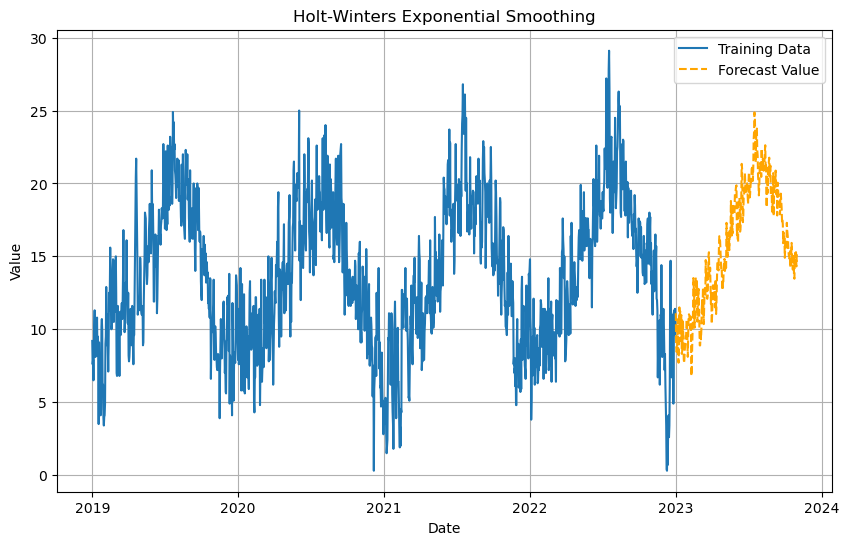

In [25]:
#Apply the holt Winter
model_hw = ExponentialSmoothing(train_data['maxtp(Maximum Air Temperature - degrees C)'], seasonal='add', seasonal_periods=365)
fit_model_hw = model_hw.fit()

forecast_fitting_evaluation_hw = fit_model_hw.forecast(steps=len(test_data['maxtp(Maximum Air Temperature - degrees C)']))

plt.figure(figsize=(10, 6))
plt.plot(train_data['date'], train_data['maxtp(Maximum Air Temperature - degrees C)'], label='Training Data')
plt.plot(test_data['date'], forecast_fitting_evaluation_hw, label='Forecast Value', linestyle='--', color='orange')
plt.title('Holt-Winters Exponential Smoothing')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()

In [26]:
fit_model_hw.summary()

Dep. Variable:,maxtp(Maximum Air Temperature - degrees C),No. Observations:,1461
Model:,ExponentialSmoothing,SSE,5548.711
Optimized:,True,AIC,2683.624
Trend:,None,BIC,4623.907
Seasonal:,Additive,AICC,2933.908
Seasonal Periods:,365,Date:,"Wed, 03 Jan 2024"
Box-Cox:,False,Time:,20:20:21
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.6396564,alpha,True
smoothing_seasonal,5.0518e-08,gamma,True


In [27]:
rmse = np.sqrt(mean_squared_error(ts_fitting_evaluation, forecast_fitting_evaluation_hw))
mae = mean_absolute_error(ts_fitting_evaluation, forecast_fitting_evaluation_hw)
mse = mean_squared_error(ts_fitting_evaluation, forecast_fitting_evaluation_hw)

print("RMSE:", rmse)
print("MAE:", mae)
print("MSE:", mse)

RMSE: 2.986038373882487
MAE: 2.3821539082060026
MSE: 8.916425170298767


In [28]:
#Test for Data is Stationary or Non Stationary
data = df[df['date'].dt.year.between(2019, 2022)]
result = adfuller(data['maxtp(Maximum Air Temperature - degrees C)'])

print('ADF Statistic:', result[0])
print('p-value:', result[1])
if result[1] <= 0.05:
    print('Data is stationary')
else:
    print('Data is non-stationary')

ADF Statistic: -2.6638240648080322
p-value: 0.08051019281161897
Data is non-stationary


In [29]:
#Take the First differencing to make it stationary
data = df[df['date'].dt.year.between(2018, 2022)]
data_diff = data['maxtp(Maximum Air Temperature - degrees C)'].diff(periods=365).dropna()
data_diff

28124    1.7
28125   -3.5
28126   -0.2
28127   -2.8
28128    1.7
        ... 
29580    2.0
29581    3.3
29582   -4.2
29583   -2.1
29584   -4.1
Name: maxtp(Maximum Air Temperature - degrees C), Length: 1461, dtype: float64

In [30]:
#Again Test for Data is Stationary or Non Stationary
result = adfuller(data_diff)

print('ADF Statistic:', result[0])
print('p-value:', result[1])

ADF Statistic: -10.881473738259556
p-value: 1.2915236511228987e-19


<Figure size 1200x500 with 0 Axes>

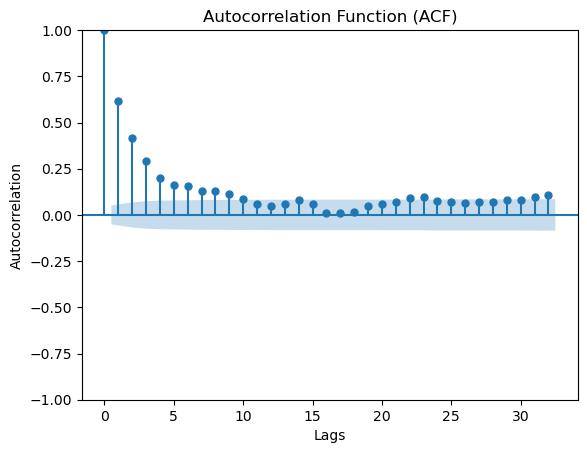

<Figure size 1200x500 with 0 Axes>

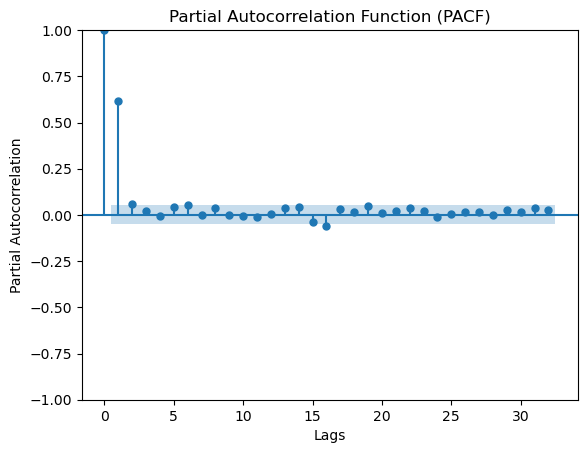

In [31]:
#Create ACF Plot
plt.figure(figsize=(12, 5))
plot_acf(data_diff)  # Adjust the number of lags as needed
plt.xlabel('Lags')
plt.ylabel('Autocorrelation')
plt.title('Autocorrelation Function (ACF)')
plt.show()

# Create PACF plot
plt.figure(figsize=(12, 5))
plot_pacf(data_diff)  # Adjust the number of lags as needed
plt.xlabel('Lags')
plt.ylabel('Partial Autocorrelation')
plt.title('Partial Autocorrelation Function (PACF)')
plt.show()

# ARIMA

In [32]:
autoarima_model = auto_arima(train_data['maxtp(Maximum Air Temperature - degrees C)'], seasonal=True, trace=True)
print(autoarima_model.summary())

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=6390.353, Time=1.58 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=6609.817, Time=0.12 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=6545.247, Time=0.27 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=6511.968, Time=0.39 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=6607.817, Time=0.09 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=6388.332, Time=0.98 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=6436.716, Time=0.56 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=6386.353, Time=0.84 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=6388.330, Time=1.20 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=6513.901, Time=0.45 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=6384.353, Time=0.30 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=6509.969, Time=0.21 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=6543.247, Time=0.19 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=6386.331, Time=0.46 sec
 ARIMA(1,1,2)(0,0,0)[0]          

C:\Users\gaura\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\gaura\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\gaura\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\gaura\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\gaura\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next versio

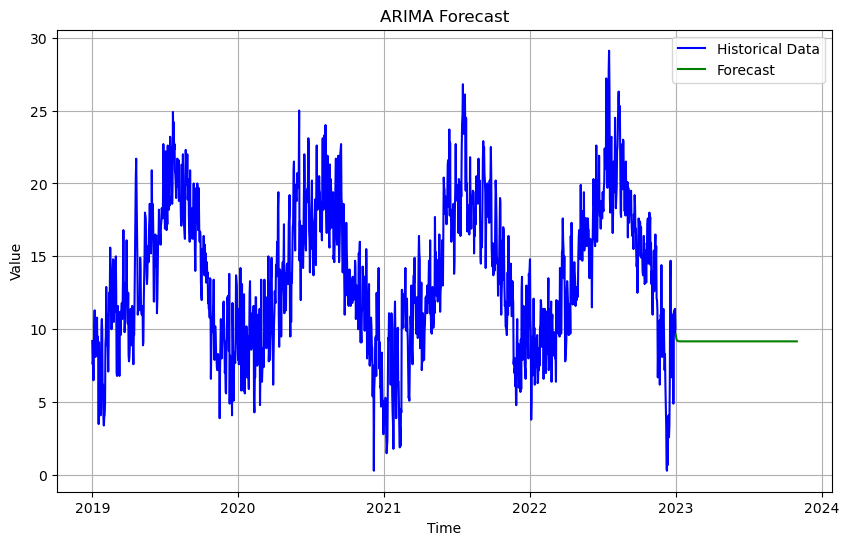

In [33]:
#Apply the ARIMA Model of p=1,d=1,q=1
arima_model = ARIMA(train_data['maxtp(Maximum Air Temperature - degrees C)'],order=(1,1,1))
fit_model = arima_model.fit()

forecast = fit_model.forecast(steps=len(test_data['maxtp(Maximum Air Temperature - degrees C)']))

plt.figure(figsize=(10, 6))
plt.plot(train_data['date'], train_data['maxtp(Maximum Air Temperature - degrees C)'], label='Historical Data', color='blue')

plt.plot(test_data['date'], forecast, label='Forecast', color='green')

plt.title('ARIMA Forecast')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()

In [34]:
#Visualise the summary
fit_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                           SARIMAX Results                                            
======================================================================================================
Dep. Variable:     maxtp(Maximum Air Temperature - degrees C)   No. Observations:                 1461
Model:                                         ARIMA(1, 1, 1)   Log Likelihood               -3189.177
Date:                                        Wed, 03 Jan 2024   AIC                           6384.353
Time:                                                20:20:33   BIC                           6400.212
Sample:                                                     0   HQIC                          6390.269
                                                       - 1461                                         
Covariance Type:                                          opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5505      0.030     18.169      0.000       0.491       0.610
ma.L1         -0.8935      0.016    -55.041      0.000      -0.925      -0.862
sigma2         4.6202      0.154     29.998      0.000       4.318       4.922
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                19.29
Prob(Q):                              0.94   Prob(JB):                         0.00
Heteroskedasticity (H):               0.98   Skew:                            -0.00
Prob(H) (two-sided):                  0.83   Kurtosis:                         3.56
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [35]:
acorr_ljungbox(fit_model.resid,lags=10)

,lb_stat,lb_pvalue
1,0.000181,0.989262
2,0.220601,0.895565
3,0.267936,0.965942
4,5.631850,0.228381
5,5.691817,0.337370
6,8.017840,0.236799
7,8.438329,0.295532
8,9.939068,0.269329
9,10.152081,0.338314
10,11.086517,0.350817


In [36]:
rmse = np.sqrt(mean_squared_error(test_data['maxtp(Maximum Air Temperature - degrees C)'], forecast))
mae = mean_absolute_error(test_data['maxtp(Maximum Air Temperature - degrees C)'], forecast)
mse = mean_squared_error(test_data['maxtp(Maximum Air Temperature - degrees C)'], forecast)

print("RMSE:", rmse)
print("MAE:", mae)
print("MSE:", mse)

RMSE: 7.558717297394939
MAE: 6.441414932206317
MSE: 57.13420718193744


In [37]:
#Convert the data into weekly basis as feeding seasonal data for 365 oorder is difficult for SARIMA
train_month=df[df['date'].dt.year.between(2019, 2022)]
test_month=df[df['date'].dt.year == 2023]
train_month.set_index('date', inplace=True)
monthly_data_train = train_month['maxtp(Maximum Air Temperature - degrees C)'].resample('W').mean()
monthly_data_train

date
2019-01-06     8.283333
2019-01-13     9.785714
2019-01-20     7.671429
2019-01-27     7.371429
2019-02-03     5.071429
                ...    
2022-12-04     9.342857
2022-12-11     3.671429
2022-12-18     4.885714
2022-12-25    10.057143
2023-01-01     9.716667
Freq: W-SUN, Name: maxtp(Maximum Air Temperature - degrees C), Length: 209, dtype: float64

In [38]:
test_month.set_index('date', inplace=True)

In [39]:
monthly_data_test = test_month['maxtp(Maximum Air Temperature - degrees C)'].resample('W').mean()
monthly_data_test

date
2023-01-01     6.800000
2023-01-08    10.657143
2023-01-15     9.842857
2023-01-22     5.714286
2023-01-29     9.214286
2023-02-05    10.085714
2023-02-12     9.928571
2023-02-19    12.142857
2023-02-26     9.685714
2023-03-05     7.471429
2023-03-12     7.000000
2023-03-19    11.314286
2023-03-26    12.657143
2023-04-02    12.957143
2023-04-09    12.914286
2023-04-16    11.871429
2023-04-23    12.657143
2023-04-30    13.757143
2023-05-07    16.485714
2023-05-14    15.971429
2023-05-21    16.514286
2023-05-28    17.842857
2023-06-04    16.571429
2023-06-11    17.400000
2023-06-18    21.428571
2023-06-25    21.785714
2023-07-02    19.300000
2023-07-09    19.328571
2023-07-16    18.314286
2023-07-23    17.928571
2023-07-30    19.114286
2023-08-06    18.300000
2023-08-13    20.314286
2023-08-20    20.157143
2023-08-27    19.414286
2023-09-03    18.714286
2023-09-10    23.700000
2023-09-17    15.914286
2023-09-24    16.900000
2023-10-01    17.214286
2023-10-08    18.128571
2023-10-15 

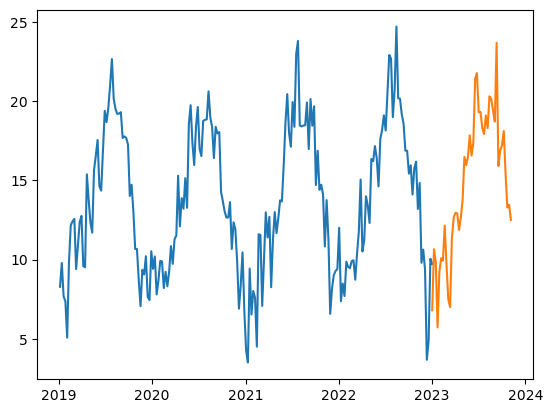

In [40]:
#Plot the data on weekly basis
plt.plot(monthly_data_train)
plt.plot(monthly_data_test)

In [41]:
monthly_data_train_1 = monthly_data_train.to_frame(name='maxtp(Maximum Air Temperature - degrees C)')
monthly_data_test_1= monthly_data_test.to_frame(name='maxtp(Maximum Air Temperature - degrees C)')

In [42]:
monthly_data_train_1

,maxtp(Maximum Air Temperature - degrees C)
date,
2019-01-06,8.283333
2019-01-13,9.785714
2019-01-20,7.671429
2019-01-27,7.371429
2019-02-03,5.071429
...,...
2022-12-04,9.342857
2022-12-11,3.671429
2022-12-18,4.885714


# Seasonal ARIMA 

C:\Users\gaura\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\gaura\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


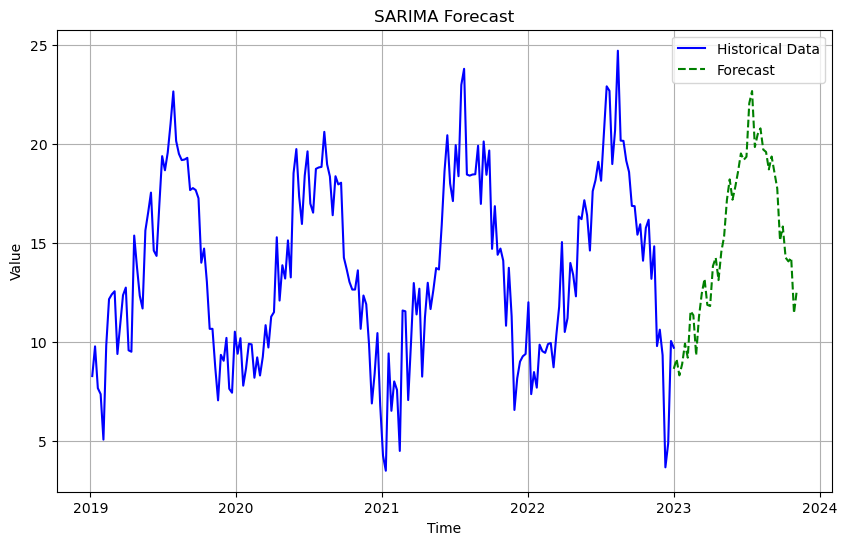

In [43]:
#Apply the SARIMAX Model of p=1,d=1,q=1,s=52
arima_model = SARIMAX(monthly_data_train_1['maxtp(Maximum Air Temperature - degrees C)'],order=(1,1,1),seasonal_order=(1, 1, 1, 52))
fit_model = arima_model.fit()

forecast = fit_model.forecast(steps=len(monthly_data_test_1['maxtp(Maximum Air Temperature - degrees C)']))

plt.figure(figsize=(10, 6))
plt.plot(monthly_data_train_1.index, monthly_data_train_1['maxtp(Maximum Air Temperature - degrees C)'], label='Historical Data', color='blue')

plt.plot(monthly_data_test_1.index, forecast, label='Forecast', linestyle='--', color='green')

plt.title('SARIMA Forecast')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()

In [44]:
#Visualise the summary
fit_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                           SARIMAX Results                                            
======================================================================================================
Dep. Variable:     maxtp(Maximum Air Temperature - degrees C)   No. Observations:                  209
Model:                         SARIMAX(1, 1, 1)x(1, 1, 1, 52)   Log Likelihood                -346.179
Date:                                        Wed, 03 Jan 2024   AIC                            702.359
Time:                                                20:20:53   BIC                            717.608
Sample:                                            01-06-2019   HQIC                           708.552
                                                 - 01-01-2023                                         
Covariance Type:                                          opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2744      0.072      3.801      0.000       0.133       0.416
ma.L1         -0.9691      0.033    -29.547      0.000      -1.033      -0.905
ar.S.L52      -0.0549      0.309     -0.178      0.859      -0.660       0.550
ma.S.L52      -0.9960     62.585     -0.016      0.987    -123.660     121.668
sigma2         2.9985    186.802      0.016      0.987    -363.128     369.125
===================================================================================
Ljung-Box (L1) (Q):                   0.04   Jarque-Bera (JB):                 0.33
Prob(Q):                              0.85   Prob(JB):                         0.85
Heteroskedasticity (H):               0.82   Skew:                            -0.11
Prob(H) (two-sided):                  0.47   Kurtosis:                         3.01
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [45]:
acorr_ljungbox(fit_model.resid,lags=10)

,lb_stat,lb_pvalue
1,0.011733,0.913743
2,3.020234,0.220884
3,4.293609,0.231455
4,6.661775,0.154878
5,9.981294,0.075767
6,10.011977,0.124149
7,13.018776,0.071652
8,13.951651,0.083034
9,14.171267,0.116362
10,16.062999,0.097843


In [46]:
rmse = np.sqrt(mean_squared_error(monthly_data_test_1['maxtp(Maximum Air Temperature - degrees C)'], forecast))
mae = mean_absolute_error(monthly_data_test_1['maxtp(Maximum Air Temperature - degrees C)'], forecast)
mse = mean_squared_error(monthly_data_test_1['maxtp(Maximum Air Temperature - degrees C)'], forecast)

print("RMSE:", rmse)
print("MAE:", mae)
print("MSE:", mse)

RMSE: 2.0859709679144234
MAE: 1.6812589711420212
MSE: 4.351274878981837
